https://dzen.ru/a/YlkmuKsYlidjykjK

In [5]:
import requests

In [11]:
token = "vk1.a.1j42tH5imR1bpmCuX-0p8g2IPp0LX3rC2SJn15h7E11xBn-tBqV_CvXB0dpblie4vHsCQEizJr9OFzSEJPxPffAGMTTTn_V5Zu6Lcl6BZB9KJlkjjuBSN3TZmlTyNIwgvTqsfpOl3K3zOXZeWgfs5_eIFLy7K1P4vSraEB8BXpob3UjN1_0H-xe02TVzAKDF"

In [57]:
class VK:
    def __init__(self, token):
        self.token = token
        
        
    def get_user_info(self, user):
        param = {
            'access_token': token, 
             'user_ids': user, 
             # 'fields': 'about,books,bdate,career,common_count,connections,contacts,city,country,sex,schools,screen_name,interests,nickname,photo_100', 
             'fields': "nickname",
             'v': 5.131,
        }
        
        method = "users.get"

        rec = requests.get(url=f'https://api.vk.com/method/{method}', params=param)
        a = rec.json()
        res = ""
        try:
            res = a["response"]
        except KeyError as err:
            print(err)
            print(a)

        return res
    
    
    def get_followers(self, user_id):
        param = {'access_token': self.token, 
         'user_ids': user_id, 
         # 'fields': 'nickname,photo_100', 
         'v': 5.131}

        method = "users.getFollowers"

        rec = requests.get(url=f'https://api.vk.com/method/{method}', params=param)

        a = rec.json()

        ds = []
        try:
            for item in a["response"]["items"]:
    #             d = {}
    #             d["id"] = item["id"]
    #             # d["photo_100"] = item["photo_100"]
    #             ds.append(d)
                ds.append((item, user_id))
        except KeyError as err:
            print(err)
            print(a)
        return ds
    
    
    def get_subscription(self, user_id):
        param = {'access_token': self.token, 
                 'user_ids': user_id, 
                 # 'fields': 'nickname,photo_100', 
                 'v': 5.131}

        method = "users.getSubscriptions"

        rec = requests.get(url=f'https://api.vk.com/method/{method}', params=param)

        a = rec.json()

        d = []
        try:
            for item in a["response"]["users"]["items"]:
                d.append((user_id, item))
        except KeyError as err:
            print(err)
            print(a)
        return d
    
    
    def get_friends(self, user_id):
        param = {'access_token': self.token, 
                 'user_id': user_id, 
                 # 'fields': 'nickname,photo_100', 
                 
                 'v': 5.131}

        method = "friends.get"

        rec = requests.get(url=f'https://api.vk.com/method/{method}', params=param)

        a = rec.json()
        # print(a)
        b = []
        try:
            for item in a["response"]["items"]:
    #             d = {"id": item, 
    # #                  "first_name": item["first_name"],
    # #                  "last_name": item["last_name"], 
    # #                  "photo_100": item["photo_100"]
    #                 }
                b.append((user_id, item))
                b.append((item, user_id))
        except KeyError as err:
            print(err)
            print(a)
        return b
    
    def get_edges(self, user_id):
        return self.get_followers(user_id) + self.get_subscription(user_id) + self.get_friends(user_id)

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualization:
   
    def __init__(self):
        self.visual = []
        self.G = nx.DiGraph()
          
    def addEdge(self, a, b):
        temp = (a,b)
        self.visual.append(temp)
          
    def visualize(self):
        plt.figure(figsize=(20, 20), dpi=80)
        self.G.add_edges_from(self.visual)
        nx.draw_networkx(self.G)
        plt.show()

G = GraphVisualization()
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(0, 3)
G.addEdge(1, 0)
G.addEdge(2, 0)
G.addEdge(3, 0)

G.addEdge(1, 4)
G.addEdge(1, 5)
G.addEdge(1, 6)
G.addEdge(2, 7)
G.addEdge(2, 8)
G.addEdge(2, 9)
G.addEdge(3, 10)
G.addEdge(3, 11)
G.addEdge(3, 12)

G.addEdge(4, 1)
G.addEdge(5, 1)
G.addEdge(6, 1)
G.addEdge(7, 2)
G.addEdge(8, 2)
G.addEdge(9, 2)
G.addEdge(10, 3)
G.addEdge(11,  3)
G.addEdge(12, 3)

k = 13
for j in range(4, 13):
    for i in range(3):
        G.addEdge(j, k + i + (j-4)*3)
        G.addEdge( k + i + (j-4)*3, j)
        

    
G.addEdge(10,6)
G.addEdge(6,10)
G.addEdge(35,4)
G.addEdge(4,35)
G.addEdge(9,10)

G.addEdge(39,40)
G.addEdge(40,39)

G.addEdge(29,1)
G.addEdge(1,8)
G.addEdge(22, 18)
G.addEdge(32, 2)

# G.visualize()
class VK2:
    def __init__(self, graph: GraphVisualization):
        self.graph = graph
    
    def get_edges(self, user_id):
        res = []
        for el in self.graph.visual:
            if user_id in el:
                res.append(el)
        return res
    
vk = VK2(G)
edges = vk.get_edges(0)
edges

[(0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (3, 0)]

In [54]:
G.G.edges

OutEdgeView([(0, 1), (0, 2), (0, 3), (1, 0), (1, 4), (1, 5), (1, 6), (1, 8), (2, 0), (2, 7), (2, 8), (2, 9), (3, 0), (3, 10), (3, 11), (3, 12), (4, 1), (4, 13), (4, 14), (4, 15), (4, 35), (5, 1), (5, 16), (5, 17), (5, 18), (6, 1), (6, 19), (6, 20), (6, 21), (6, 10), (7, 2), (7, 22), (7, 23), (7, 24), (8, 2), (8, 25), (8, 26), (8, 27), (9, 2), (9, 28), (9, 29), (9, 30), (9, 10), (10, 3), (10, 31), (10, 32), (10, 33), (10, 6), (11, 3), (11, 34), (11, 35), (11, 36), (12, 3), (12, 37), (12, 38), (12, 39), (13, 4), (14, 4), (15, 4), (16, 5), (17, 5), (18, 5), (19, 6), (20, 6), (21, 6), (22, 7), (22, 18), (23, 7), (24, 7), (25, 8), (26, 8), (27, 8), (28, 9), (29, 9), (29, 1), (30, 9), (31, 10), (32, 10), (32, 2), (33, 10), (34, 11), (35, 11), (35, 4), (36, 11), (37, 12), (38, 12), (39, 12), (39, 40), (40, 39)])

In [50]:
class VK2:
    def __init__(self, graph: GraphVisualization):
        self.graph = graph
    
    def get_edges(self, user_id):
        res = []
        for el in self.graph.visual:
            if user_id in el:
                res.append(el)
        return res
    
vk = VK2(G)
edges = vk.get_edges(0)

In [36]:
vk = VK(token)
my_id = 2593900
edges = vk.get_edges(my_id)

In [ ]:
class BFS:
    def __init__(self, vk):
        self.vk = vk
    
    def run(self, user_id, depth=3):
        pass

In [ ]:
закачать на глубину 5

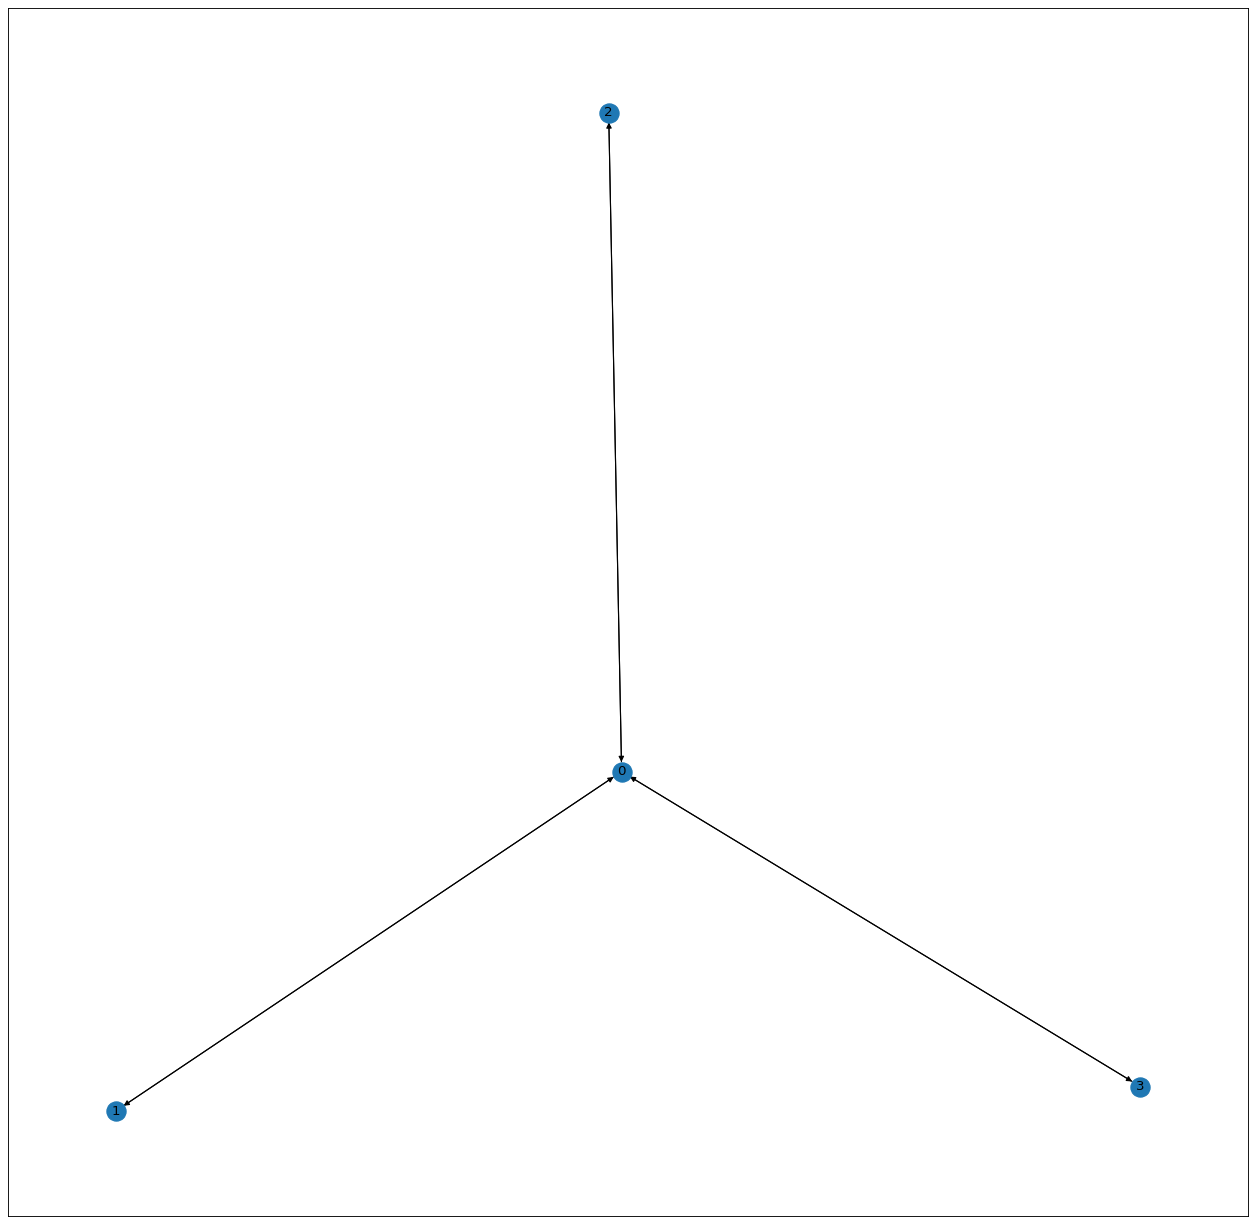

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualization2:
   
    def __init__(self):
        self.visual = []
          
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    def visualize(self):
        plt.figure(figsize=(20, 20), dpi=80)
        G = nx.DiGraph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

G2 = GraphVisualization2()
for edge in edges:
    G2.addEdge(edge[0], edge[1])
G2.visualize()

In [ ]:
лидеры мнений   def lead_m(edges)

антилидеры мнений   def anti_lead_m(edges)

самые дальние друг от друга пользователи в графе (диаметр графа)  def d_graph(edges)

In [58]:
a = "[(1,2), (3,4)]"

In [59]:
a

'[(1,2), (3,4)]'

In [60]:
b = eval(a)

In [61]:
b

[(1, 2), (3, 4)]

In [62]:
b[0]

(1, 2)

In [63]:
with open(filename, "w") as f:
    f.write(str(a))

SyntaxError: unexpected EOF while parsing (<ipython-input-63-325b91ea35f8>, line 1)

In [64]:
with open(filename) as f:
    b = eval(f.read())

SyntaxError: unexpected EOF while parsing (<ipython-input-64-66b71b163967>, line 1)

In [ ]:
a = {1: 2, 2:1, 3:4}

b = []
for k,v in a.items():
    b.append((v, k))
sorted(b)[:10]

In [ ]:
найти топ пять самых жирных ребер между городами пользователей